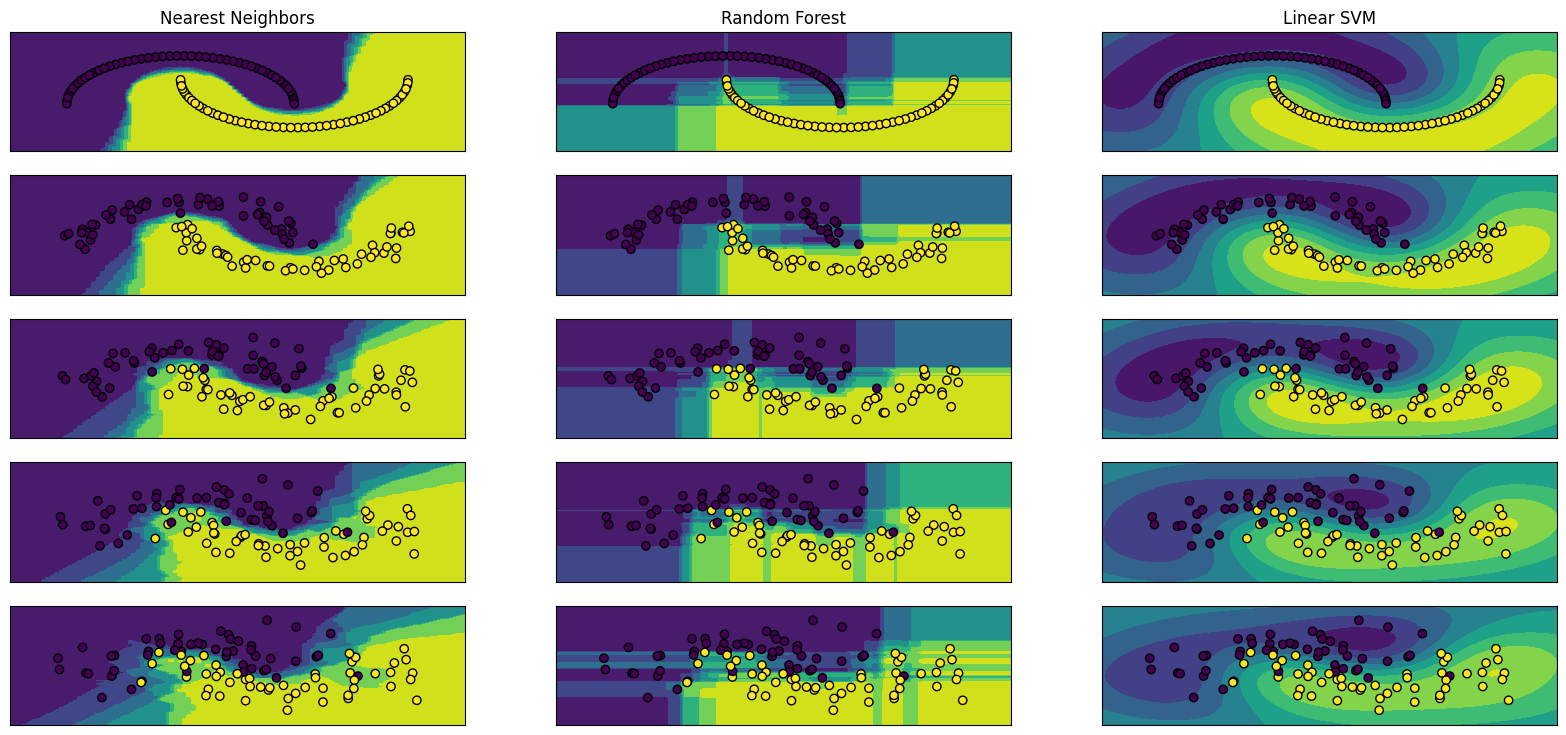

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

""" 
    ┌────────────────────────────────────────────────────────────────────────┐
    │ Données                                                                │
    └────────────────────────────────────────────────────────────────────────┘
 """

datasets = []
# datasets.append(make_moons(random_state=0))
for noise in np.arange(0, 0.5, 0.1):
    datasets.append(make_moons(noise=noise, random_state=0))

""" 
    ┌────────────────────────────────────────────────────────────────────────┐
    │ Classifiers                                                            │
    └────────────────────────────────────────────────────────────────────────┘
"""

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.inspection import DecisionBoundaryDisplay

names = [
    "Nearest Neighbors",
    "Random Forest",
    "Linear SVM",
]
classifiers = [
    KNeighborsClassifier(),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    SVC(),
]
figure = plt.figure(figsize=(27, 9))
i = 1
for ds_cnt, (X, y) in enumerate(datasets):
    i += 1
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        # clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X, y)
        DecisionBoundaryDisplay.from_estimator(clf, X, ax=ax, eps=0.5)

        # Plot the training points
        ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        i += 1
plt.show()

""" 
    ┌────────────────────────────────────────────────────────────────────────┐
    │ Growing Spheres                                                         │
    └────────────────────────────────────────────────────────────────────────┘
 """
from numpy.random import uniform


# enemy car dans ol'autre classe
class GrowingSpheres:
    """
    obs_to_interprete : x, une observation à interpréter
    classifier : classifieur binaire
    n : nombre de points que l'on génère
    """

    def __init__(self, obs_to_interprete, clf, eta, n):
        self.obs_to_interprete = obs_to_interprete.reshape(1, -1)
        self.obs_predict = clf.predict(self.obs_to_interprete)
        self.clf = clf
        self.eta = eta
        self.n = n
        self.d = self.obs_to_interprete.shape[1]

    def generate_spherical_layer(self, a0, a1) -> np.ndarray:
        """
        Génère une couche sphérique (Spherical Layer) de centre $x$ et de rayon
        interne $a_0$ et de rayon externe $a_1$.
        """

        def norm(v):
            return np.linalg.norm(v, ord=2, axis=1)

        z = np.random.normal(0, 1, (self.n, self.d))
        u = np.random.uniform(a0**self.d, a1**self.d, size=self.n)
        u = u ** (1 / self.d)
        # z = z * u / norm(z)
        z = np.array([a * b / c for a, b, c in zip(z, u, norm(z))])
        return self.obs_to_interprete + z

    # ce qui serait bien c'est avoir une animation de l'algo qui fit au fur et à mesure
    # (les sphères)

    def find_enemy(self, spherical_layer):
        """
        Return true if enemies are found
        update self.enemies to keep enemies points
        """
        pred = self.clf.predict(spherical_layer)
        self.enemies = spherical_layer[pred != self.obs_predict]
        return (pred != self.obs_predict).any()

    def maboucle(self, spherical_layer):
        while self.find_enemy(spherical_layer):
            self.eta /= 2
            spherical_layer = self.generate_spherical_layer(0, self.eta)
        a0 = self.eta
        a1 = 2 * self.eta
        while not self.find_enemy(spherical_layer):
            spherical_layer = self.generate_spherical_layer(a0, a1)
            a0 = a1
            a1 = a1 + self.eta
        return self.enemies[
            np.linalg.norm(self.enemies - self.obs_to_interprete).argmin()
        ]

    def predict(obs_to_interprete):
        pass

    def feature_selection():
        pass


t = GrowingSpheres(obs, classifiers[2], 2, 100)


In [ ]:
rdm = np.random.randint(len(datasets[0]))

obs, predict = datasets[0][0][rdm], datasets[0][1][rdm]
print(rdm, obs, predict)


In [ ]:
sph = t.generate_spherical_layer(0, 1)
sph
plt.scatter(sph[:, 0], sph[:, 1])


In [95]:
t.maboucle(sph)


array([1.22856796, 0.54730488])

In [100]:
plt.scatter(datasets[0][0, 0], datasets[0][0, 1])

TypeError: tuple indices must be integers or slices, not tuple

In [92]:
t.enemies


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])